# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 20s 0us/step


In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [21]:
def build_mlp(input_shape,output_units=10,num_neurons=[512,256,128,64]):
    input_layer=keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(num_neurons):
        if i ==0:
            x=keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
        else:
            x=keras.layers.Dense(units=n_units,activation='relu',name='hidden_layer'+str(i+1))(x)
    out=keras.layers.Dense(output_units,activation='softmax',name='output')(x)
    
    model=keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [29]:
## 超參數設定
from keras.optimizers import SGD,RMSprop,Adagrad,Adam

lr_r=0.001
epochs=10
batch_size=256
opt=[SGD,RMSprop,Adagrad,Adam]

In [30]:
results = {}
for optimizer in opt:
    model=build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer=optimizer(lr=lr_r),metrics=['accuracy'])
    model.fit(x_train,y_train,
             epochs=epochs,
             batch_size=batch_size,
             validation_split=0.2,
             shuffle=True)
    
    train_loss=model.history.history['loss']
    valid_loss=model.history.history['val_loss']
    train_acc=model.history.history['accuracy']
    valid_acc=model.history.history['val_accuracy']
    
    results[optimizer]={'train_loss':train_loss,
                      'valid_loss':valid_loss,
                      'train_acc':train_acc,
                      'valid_acc':valid_acc}

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 7s 175us/step - loss: 1.9935 - accuracy: 0.2735 - val_loss: 1.8688 - val_accuracy: 0.3280
Epoch 2/10
40000/40000 [==============================] - 7s 178us/step - loss: 1.7775 - accuracy: 0.3639 - val_loss: 1.7980 - val_accuracy: 0.3717
Epoch 3/10
40000/40000 [==============================] - 7s 168us/step - loss: 1.6873 - accuracy: 0.3970 - val_loss: 1.7141 - val_accuracy: 0.3996
Epoch 4/10
40000/40000 [==============================] - 7s 164us/step - loss: 1.6142 - accuracy: 0.4256 - val_loss: 1.5953 - val_accuracy: 0.4378
Epoch 5/10
40000/40000 [==============================] - 6s 160us/step - loss: 1.5663 - accuracy: 0.4412 - val_loss: 1.6212 - val_accuracy: 0.4254
Epoch 6/10
40000/40000 [==============================] - 7s 177us/step - loss: 1.5222 - accuracy: 0.4570 - val_loss: 1.5724 - val_accuracy: 0.4457
Epoch 7/10
40000/40000 [==============================] - 7s 1

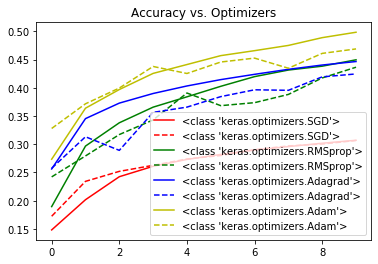

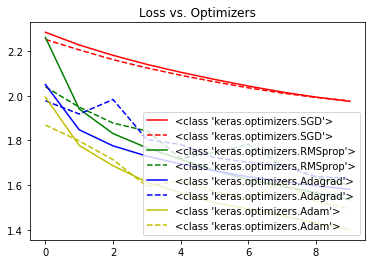

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

for i ,cond in enumerate(results.keys()):
    plt.plot(range(epochs),results[cond]['train_acc'],'-',label=cond,color=color_bar[i])
    plt.plot(range(epochs),results[cond]['valid_acc'],'--',label=cond,color=color_bar[i])
plt.title('Accuracy vs. Optimizers')
plt.legend(loc='best')
plt.show()

for i ,cond in enumerate(results.keys()):
    plt.plot(range(epochs),results[cond]['train_loss'],'-',label=cond,color=color_bar[i])
    plt.plot(range(epochs),results[cond]['valid_loss'],'--',label=cond,color=color_bar[i])
plt.title('Loss vs. Optimizers')
plt.legend(loc='lower right')
plt.show()